# 설문조사 결과 EDA(Exploratoty Data Analysis)란
**- EDA(Exploratory Data Analysis) : 탐색적 데이터 분석**
데이터셋을 다양한 관점에서 살펴보고 탐색하면서 인사이트를 찾는 것
- 각 row는 무엇을 의미하는가?
- 각 column은 무엇을 의미하는가?
- 각 column은 어떤 분포를 보이는가?
- 두 column은 어떤 연관성이 있는가?

EDA는 공식이 없고 통계적인 방법, 시각적인 방법으로 여러 가설을 찾아보는 것

## 설문조사
- column 147개

1. 0~18 : 음악 취향
2. 19~30 : 영화 취향
3. 31~62 : 취미/관심가
4. 63~72 : 공포증
5. 73~75 : 건강 습관
6. 76~132 : 성격, 인생관 등
7. 133~139 : 소비 습관
8. 140~146 : 기본정보

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns

df = pd.read_csv('C:/Users/jaewoo/Desktop/data science/data/young_survey.csv')

df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Handedness,Education
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right,bachelor's degree
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right,bachelor's degree
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right,high school
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,4.0,4,1.0,22.0,172.0,59.0,1.0,female,right,bachelor's degree
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,3.0,2,4.0,20.0,170.0,59.0,1.0,female,right,high school


In [4]:
basic_info = df.iloc[:, 140:]
basic_info.head()

,Age,Height,Weight,Number of siblings,Gender,Handedness,Education
0,20.0,163.0,48.0,1.0,female,right,bachelor's degree
1,19.0,163.0,58.0,2.0,female,right,bachelor's degree
2,20.0,176.0,67.0,2.0,female,right,high school
3,22.0,172.0,59.0,1.0,female,right,bachelor's degree
4,20.0,170.0,59.0,1.0,female,right,high school


In [5]:
basic_info.describe()

,Age,Height,Weight,Number of siblings
count,997.000000,982.000000,981.000000,995.000000
mean,20.439318,173.610998,66.407747,1.300503
std,2.835443,9.373842,13.862403,1.015548
min,15.000000,148.000000,41.000000,0.000000
25%,19.000000,167.000000,55.000000,1.000000
50%,20.000000,173.000000,64.000000,1.000000
75%,22.000000,180.000000,75.000000,2.000000
max,30.000000,203.000000,165.000000,10.000000


In [6]:
basic_info['Gender'].value_counts()

female    587
male      405
Name: Gender, dtype: int64

In [7]:
basic_info['Handedness'].value_counts()

right    895
left      99
Name: Handedness, dtype: int64

In [8]:
basic_info['Education'].value_counts()

high school          618
bachelor's degree    207
middle school         78
master's degree       78
elementary school     10
doctorate degree       5
Name: Education, dtype: int64

<AxesSubplot:ylabel='Age'>

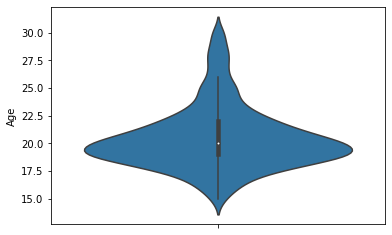

In [10]:
sns.violinplot(data=basic_info, y = 'Age')

<AxesSubplot:xlabel='Gender', ylabel='Age'>

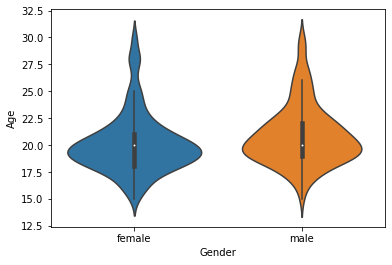

In [11]:
sns.violinplot(data=basic_info, x='Gender',y = 'Age')

<AxesSubplot:xlabel='Gender', ylabel='Age'>

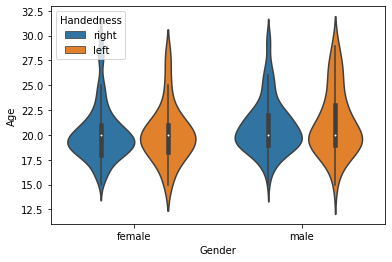

In [14]:
sns.violinplot(data=basic_info, x='Gender',y = 'Age', hue='Handedness')

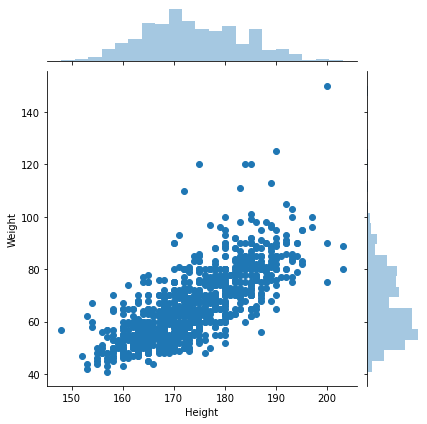

In [16]:
sns.jointplot(data=basic_info, x='Height',y = 'Weight')

# 상관관계 분석(Correlation Analysis)
- 음악값을 추출해서 상관관계 분석

In [17]:
music = df.iloc[:, :19]
music.head(0)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera


<AxesSubplot:>

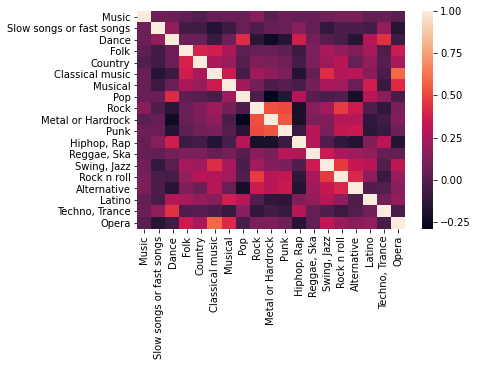

In [18]:
sns.heatmap(music.corr())

In [19]:
df.corr() 

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
Music,1.000000,0.075426,0.066719,0.027648,-0.014272,0.055648,0.056730,0.059967,0.149958,0.016043,...,0.093707,0.016673,0.043828,0.091142,0.014790,0.073037,-0.078058,-0.068002,-0.128233,-0.011585
Slow songs or fast songs,0.075426,1.000000,0.188217,-0.062023,-0.072138,-0.159021,-0.078479,0.054375,-0.018347,0.050913,...,0.064778,0.002680,0.106225,0.024667,0.036608,-0.027398,0.010998,0.106873,0.125870,0.002352
Dance,0.066719,0.188217,1.000000,0.065863,0.055106,-0.093125,0.067430,0.424794,-0.147867,-0.241477,...,0.189977,0.053353,0.078635,0.184652,0.078517,0.026210,0.031215,-0.012681,0.014024,0.003952
Folk,0.027648,-0.062023,0.065863,1.000000,0.391850,0.366988,0.263987,0.023641,0.056471,0.062454,...,-0.069797,-0.129808,-0.099580,-0.121036,-0.155832,-0.013442,0.132414,-0.076549,-0.013412,0.089963
Country,-0.014272,-0.072138,0.055106,0.391850,1.000000,0.257474,0.202831,0.000716,0.129917,0.115289,...,-0.071510,-0.057090,-0.065920,-0.095447,0.000729,0.007146,0.074586,0.024685,0.073452,0.035615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Spending on healthy eating,0.073037,-0.027398,0.026210,-0.013442,0.007146,0.077416,0.064933,-0.025233,0.030247,-0.005333,...,0.106373,0.178066,0.148477,0.237851,0.243666,1.000000,0.015248,0.019720,0.029572,-0.082342
Age,-0.078058,0.010998,0.031215,0.132414,0.074586,0.035176,0.014553,0.020440,-0.000670,0.004109,...,-0.133800,-0.066627,-0.032284,-0.073129,-0.012082,0.015248,1.000000,0.122711,0.238893,0.089174
Height,-0.068002,0.106873,-0.012681,-0.076549,0.024685,-0.005057,-0.240144,-0.133551,-0.024931,0.116562,...,-0.136491,0.146116,0.165349,-0.089903,0.235986,0.019720,0.122711,1.000000,0.735923,-0.005442
Weight,-0.128233,0.125870,0.014024,-0.013412,0.073452,0.010132,-0.152645,-0.093742,0.007529,0.168364,...,-0.151023,0.101246,0.141377,-0.085356,0.244790,0.029572,0.238893,0.735923,1.000000,-0.026374


In [21]:
df.corr()['Age'].sort_values(ascending = False)

Age                        1.000000
Weight                     0.238893
Elections                  0.212319
Prioritising workload      0.156256
Reliability                0.148141
                             ...   
Mood swings               -0.111890
Getting up                -0.119888
Questionnaires or polls   -0.128187
Shopping centres          -0.133800
Changing the past         -0.146895
Name: Age, Length: 139, dtype: float64

## 실전과제 _ 브런치 카페 음악 셀렉션
대위는 신촌에서 대학생들을 대상으로 브런치 카페를 운영합니다.

손님들의 취향에 딱 맞는 음악을 틀고 싶은데요. 브런치 카페이기 때문에, 일찍 일어나는 사람들이 좋아할 만한 음악이 무엇인지 분석해 보려고 합니다.  

주어진 데이터(다운로드)의 “Getting up”이라는 column을 보면 사람들이 아침에 일어나는 걸 얼마나 어려워하는지 알 수 있습니다. 5라고 대답한 사람들은 아침에 일어나는 걸 아주 어려워 하는 사람들이고, 1이라고 대답한 사람들은 아침에 쉽게 일어난다는 거죠.

이 데이터로 봤을 때, 아침에 일찍 일어나는 사람들이 가장 좋아할 만한 음악 장르는 무엇인가요?

In [24]:
df

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Handedness,Education
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right,bachelor's degree
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right,bachelor's degree
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right,high school
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,4.0,4,1.0,22.0,172.0,59.0,1.0,female,right,bachelor's degree
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,3.0,2,4.0,20.0,170.0,59.0,1.0,female,right,high school
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,3,4.0,20.0,164.0,57.0,1.0,female,right,high school
993,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,1.0,5,3.0,27.0,183.0,80.0,5.0,male,left,master's degree
994,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,2.0,2,5.0,18.0,173.0,75.0,0.0,female,right,high school
995,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,3.0,3,3.0,25.0,173.0,58.0,1.0,female,right,bachelor's degree


In [25]:
interesting = df.corr()['Getting up']
interesting[1:19].sort_values(ascending = False)

Rock                        0.105245
Pop                         0.079101
Hiphop, Rap                 0.038980
Rock n roll                 0.028889
Alternative                 0.027540
Dance                       0.027249
Techno, Trance              0.019863
Swing, Jazz                 0.019556
Classical music             0.014285
Musical                     0.011869
Reggae, Ska                -0.008434
Latino                     -0.015060
Country                    -0.025315
Metal or Hardrock          -0.026769
Punk                       -0.029189
Folk                       -0.049612
Slow songs or fast songs   -0.052613
Opera                      -0.071819
Name: Getting up, dtype: float64

- 결과 : 아침에 일어나는 사람들은 Opera를 가장 선호하는 것을 알 수 있다.

# 실전과제 _ 스타트업 아이템 탐색하기

## 가설검정
경영학과 3학년이 된 영준이는 스타트업을 준비하고 있습니다.
사업 아이템을 고민하면서, 나름대로 가설을 몇 개 세워봤습니다.

- 악기를 다루는 사람들은 시 쓰기를 좋아하는 경향이 있을 것이다.
- 외모에 돈을 많이 투자하는 사람들은 브랜드 의류를 선호할 것이다.
- 메모를 자주 하는 사람들은 새로운 환경에 쉽게 적응할 것이다.
- 워커홀릭들은 건강한 음식을 먹으려는 경향이 있을 것이다.

이 내용을 사업 아이템으로 확장하기 전에, 데이터를 통해 가설을 검증해보려고 하는데요.  가장 가능성이 낮은 가설을 골라보세요.

## column 설명
- Branded clothing: 나는 브랜드가 없는 옷보다 브랜드가 있는 옷을 선호한다.
- Healthy eating: 나는 건강하거나 품질이 좋은 음식에는 기쁘게 돈을 더 낼 수 있다.
- Musical instruments: 나는 악기 연주에 관심이 많다.
- New environment: 나는 새 환경에 잘 적응하는 편이다.
- Prioritising workload: 나는 일을 미루지 않고 즉시 해결해버리려고 한다.
- Spending on looks: 나는 내 외모에 돈을 많이 쓴다.
- Workaholism: 나는 여가 시간에 공부나 일을 자주 한다.
- Writing: 나는 시 쓰기에 관심이 많다.
- Writing notes: 나는 항상 메모를 한다.

## 가설
1. 악기를 다루는 사람들은 시 쓰기를 좋아하는 경향이 있을 것이다.
2. 외모에 돈을 많이 투자하는 사람들은 브랜드 의류를 선호할 것이다.
3. 메모를 자주 하는 사람들은 새로운 환경에 쉽게 적응할 것이다.
4. 워커홀릭들은 건강한 음식을 먹으려는 경향이 있을 것이다.

In [27]:
#1번 가설검정
df.corr().loc['Musical instruments','Writing']

0.34381621439042986

In [28]:
#2번 가설검정
df.corr().loc['Spending on looks','Branded clothing']

0.4183989446458914

In [29]:
#3번 가설검정
mu_df = df.corr()['Writing notes']
mu_df['New environment']

-0.07939652994810564

In [30]:
#4번 가설검정
mu_df = df.corr()['Workaholism']
mu_df['Healthy eating']

0.23864443283866651

- 결과 : 3번 가설이 가장 낮은 상관관계를 나타냄

## 클러스터 분석(Cluster Analysis)

- Seaborn 라이브러리 활용  
비슷한 부류끼리 동아리를 만들어보려고 함   
어떻게 묶는것이 가장 효율적일까?

## 실전과제 _ 영화 카페 운영하기

음악 선곡을 잘해서 대위의 브런치 카페는 대박이 났습니다. 그런데 브런치 카페이다 보니 저녁 시간대에는 가게가 텅텅 빌 수밖에 없죠.

고민 끝에, 저녁에는 가게를 영화 카페로 변신시켜 볼까 하는데요. 우선 수 많은 영화 DVD를 어떻게 배치해야 할지 고민입니다. 좀 연관된 장르끼리 묶어서 보관해야, 각 손님들의 취향을 잘 맞출 수 있을 것 같습니다.

이번에도 대박을 위해서 데이터의 도움을 최대한 빌리려고 합니다.

주어진 데이터셋에서 영화 장르에 대한 column은 'Horror'부터 'Action'까지 입니다. 영화 장르에 대해서 clustermap을 그려 보세요.

In [31]:
df

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Handedness,Education
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right,bachelor's degree
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right,bachelor's degree
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right,high school
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,4.0,4,1.0,22.0,172.0,59.0,1.0,female,right,bachelor's degree
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,3.0,2,4.0,20.0,170.0,59.0,1.0,female,right,high school
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,3,4.0,20.0,164.0,57.0,1.0,female,right,high school
993,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,1.0,5,3.0,27.0,183.0,80.0,5.0,male,left,master's degree
994,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,2.0,2,5.0,18.0,173.0,75.0,0.0,female,right,high school
995,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,3.0,3,3.0,25.0,173.0,58.0,1.0,female,right,bachelor's degree


In [32]:
interests = df.loc[:, 'Horror':'Action']
interests.head()

,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action
0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0
1,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0
2,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0
3,4.0,4.0,3.0,3.0,4.0,3.0,1.0,2.0,5.0,1.0,2.0
4,4.0,4.0,5.0,2.0,3.0,3.0,4.0,4.0,3.0,1.0,4.0


In [33]:
corr = interests.corr()
corr

,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action
Horror,1.000000,0.503069,0.098243,-0.128117,0.165834,0.136508,-0.087150,0.004865,-0.063749,0.078845,0.129958
Thriller,0.503069,1.000000,-0.008975,-0.164751,0.230838,0.220754,-0.090075,-0.025239,0.046558,0.124719,0.278214
Comedy,0.098243,-0.008975,1.000000,0.286236,0.040425,-0.077274,0.211025,0.180246,-0.007444,-0.033091,0.121256
Romantic,-0.128117,-0.164751,0.286236,1.000000,-0.097219,-0.193751,0.349432,0.239951,-0.083895,-0.126574,-0.181823
Sci-fi,0.165834,0.230838,0.040425,-0.097219,1.000000,0.274634,-0.009158,0.068642,0.141714,0.276898,0.363429
War,0.136508,0.220754,-0.077274,-0.193751,0.274634,1.000000,-0.072474,-0.026996,0.235355,0.396669,0.299257
Fantasy/Fairy tales,-0.087150,-0.090075,0.211025,0.349432,-0.009158,-0.072474,1.000000,0.679270,0.140227,-0.023267,-0.051591
Animated,0.004865,-0.025239,0.180246,0.239951,0.068642,-0.026996,0.679270,1.000000,0.148375,-0.003069,0.019379
Documentary,-0.063749,0.046558,-0.007444,-0.083895,0.141714,0.235355,0.140227,0.148375,1.000000,0.263859,0.131062
Western,0.078845,0.124719,-0.033091,-0.126574,0.276898,0.396669,-0.023267,-0.003069,0.263859,1.000000,0.320005


In [34]:
corr['Horror'].sort_values(ascending = False)

Horror                 1.000000
Thriller               0.503069
Sci-fi                 0.165834
War                    0.136508
Action                 0.129958
Comedy                 0.098243
Western                0.078845
Animated               0.004865
Documentary           -0.063749
Fantasy/Fairy tales   -0.087150
Romantic              -0.128117
Name: Horror, dtype: float64

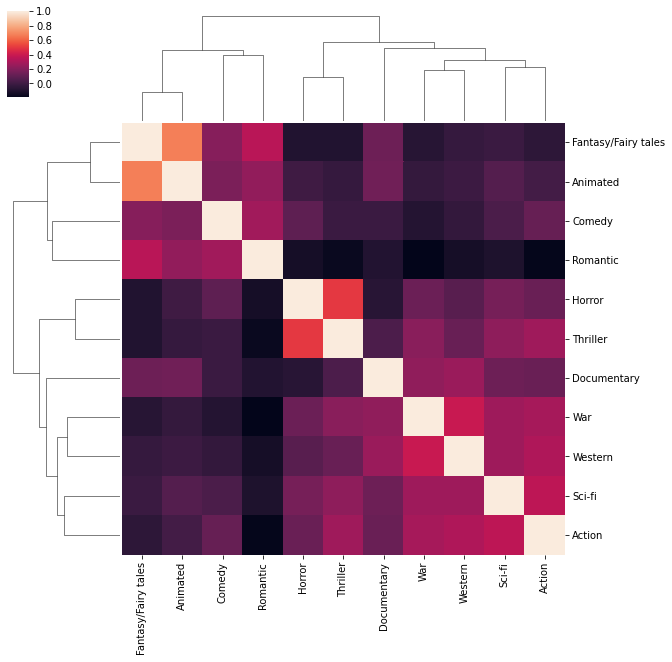

In [35]:
sns.clustermap(corr)

# 실습과제_타이타닉
RMS 타이타닉은 1912년에 빙산과 충돌해 침몰한 여객선입니다. 타이타닉호의 침몰은 무려 1514명 정도가 사망한 비운의 사건이죠. 영화 ‘타이타닉’으로 인해 이름이 가장 널리 알려진 여객선이기도 합니다.

우리에게 주어진 titanic.csv 파일에는 당시 탑승자들의 정보가 담겨 있습니다. 생존 여부, 성별, 나이, 지불한 요금, 좌석 등급 등의 정보가 있는데요.

- 생존 여부는 'Survived' column에 저장되어 있습니다. 0이 사망, 1이 생존을 의미합니다.
- 좌석 등급은 'Pclass' column에 저장되어 있습니다. 1은 1등실, 2는 2등실, 3은 3등실을 의미합니다.
- 지불한 요금은 'Fare' column에 저장되어 있습니다.

다양한 방면으로 EDA(탐색적 데이터 분석)을 하시오

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns

In [44]:
df = pd.read_csv('C:/Users/jaewoo/Desktop/titanic.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 가설_1 : 타이타닉의 승객은 30,40대가 가장 많다.

<AxesSubplot:ylabel='Frequency'>

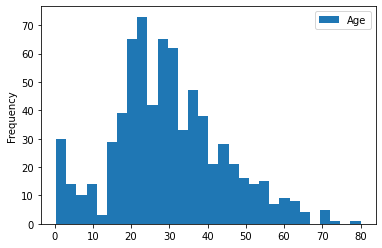

In [45]:
df.plot(kind = 'hist', y = 'Age', bins = 30)

#### 결과 :거짓
20대가 더 많다.

## 가설_2 : 가장 높은 요금을 낸 사람은 30대이다.

In [14]:
# 1번째 방법
age = df.loc[:, 'Age':'Fare']
age[['Age', 'Fare']].sort_values(ascending = False, by = ['Fare', 'Age'])


,Age,Fare
679,36.0,512.3292
258,35.0,512.3292
737,35.0,512.3292
438,64.0,263.0000
341,24.0,263.0000
...,...,...
481,NaN,0.0000
633,NaN,0.0000
674,NaN,0.0000
732,NaN,0.0000


<AxesSubplot:xlabel='Age', ylabel='Fare'>

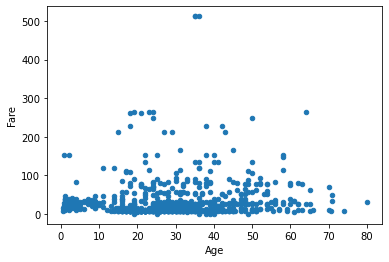

In [47]:
# 2번째 방법_나이별 요금 분포
df.plot(kind='scatter', x='Age', y='Fare')

#### 결과 : 참

## 가설_3 : 생존자가 사망자보다 더 많다.

In [19]:
survive = df['Survived'].value_counts()
survive

0    549
1    342
Name: Survived, dtype: int64

#### 결과 : 거짓
사망자(0)가 더 많다.

## 가설_4 : 가장 많은 사람이 탑승한 곳은 3등실이다.

In [20]:
Pclass = df['Pclass'].value_counts()
Pclass

3    491
1    216
2    184
Name: Pclass, dtype: int64

#### 결과 : 참

## 가설_5 : 가장 생존율이 높은 객실 등급은 1등실이다.


C:\Users\jaewoo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

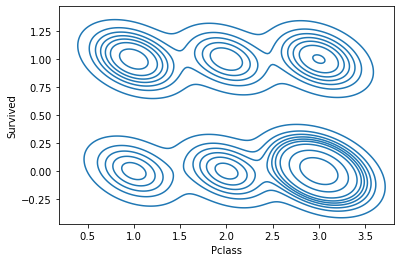

In [50]:
sns.kdeplot(df['Pclass'], df['Survived'])


#### 결과 : 참 
1듭급은 0보다 1이 더 많다는것을 확인할 수 있다.

## 가설_6 : 나이가 어릴수록 생존율이 높다.

In [25]:
df[['Age', 'Survived']].corr()

,Age,Survived
Age,1.000000,-0.077221
Survived,-0.077221,1.000000


#### 결과 : 거짓

## 가설_7 : 나이보다 성별이 생존율에 더 많은 영향을 미친다.

<AxesSubplot:xlabel='Survived', ylabel='Age'>

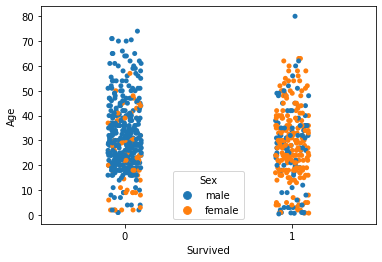

In [51]:
sns.stripplot(data=df, x="Survived", y="Age", hue="Sex")